In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
path = "./sims/extra_power/"
scales = np.linspace(1,3,9)

In [18]:
scales

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

In [23]:
means = []
var = []
for s in scales:
    dfs = []
    m = []
    v = []
    for i in range(10):
        filename = path + "extra_power_{}_{}".format(round(s,2),i)
        dfs.append(pd.read_csv(filename, names=['total_cost', 'true_demand', 'demand_sd', '2x_sup_sd', 'ren_sup', 'rem_demand']))
        try:
            dfs[i] = dfs[i].drop(730)
        except:
            pass
        dfs[i]["total_cost"] = pd.to_numeric(dfs[i]["total_cost"], downcast="float")
        dfs[i]['avg_cost'] = dfs[i]['total_cost'] / dfs[i]['true_demand']
        m.append(dfs[i]['avg_cost'].mean())
        v.append((dfs[i]['avg_cost'].var()))
    m = np.array(m)
    v = np.array(v)
    means.append(m.mean())
    var.append(v.mean())


In [24]:
var

[52.73869912846804,
 54.76459433557877,
 56.072860987884816,
 61.18200521767511,
 61.54316496677977,
 67.20656559469782,
 69.05806344124248,
 70.73812561422105,
 74.03304777021327]

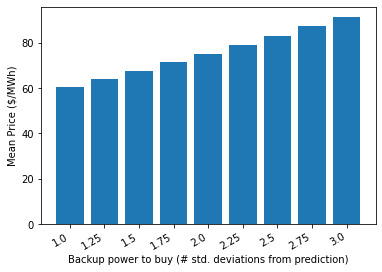

In [25]:
fig,ax = plt.subplots()
ax.bar(np.arange(9),means,tick_label=[round(x,2) for x in scales])
ax.set_xticklabels([round(x,2) for x in scales], rotation=30, ha='right')
ax.set_xlabel("Backup power to buy (# std. deviations from prediction)")
ax.set_ylabel("Mean Price ($/MWh)")
plt.savefig("extra_power_vs_avg_price_sensitivity.png",bbox_inches='tight')

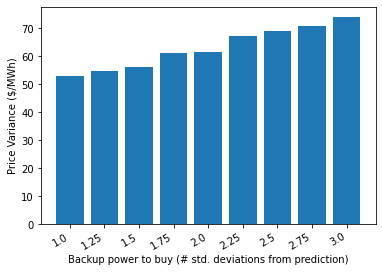

In [26]:
fig,ax = plt.subplots()
ax.bar(np.arange(9),var,tick_label=[round(x,2) for x in scales])
ax.set_xticklabels([round(x,2) for x in scales], rotation=30, ha='right')
ax.set_xlabel("Backup power to buy (# std. deviations from prediction)")
ax.set_ylabel("Price Variance ($/MWh)")
plt.savefig("extra_power_vs_price_variance_sensitivity.png",bbox_inches='tight')

In [11]:
df = dfs[0]

In [13]:
t = df['2x_sup_sd'] - df['ren_sup']

In [14]:
t.mean()

-101413.08603192936

In [15]:
df

,total_cost,true_demand,demand_sd,2x_sup_sd,ren_sup,rem_demand,avg_cost
0,779300224.0,5.872184e+06,208367.935991,1.372023e+06,1.132506e+06,NaN,132.710448
1,780377792.0,5.615657e+06,209115.992584,1.375284e+06,1.159445e+06,NaN,138.964637
2,784567040.0,5.682320e+06,207711.461195,1.375773e+06,1.264175e+06,NaN,138.071598
3,807372928.0,5.630278e+06,208107.919579,1.374740e+06,1.834323e+06,NaN,143.398402
4,775928960.0,4.909157e+06,208418.533755,1.371898e+06,1.048225e+06,NaN,158.057466
5,791414912.0,4.689005e+06,207663.392692,1.375099e+06,1.435373e+06,NaN,168.780990
6,711968320.0,4.991066e+06,206996.454394,1.373742e+06,2.688962e+06,NaN,142.648554
7,684784960.0,5.017944e+06,206329.803965,1.383980e+06,3.052159e+06,NaN,136.467226
8,786172544.0,5.091093e+06,206134.269279,1.425328e+06,2.270487e+06,NaN,154.421174
9,790546944.0,4.703425e+06,206171.100159,1.383302e+06,1.413674e+06,NaN,168.079004
